# **Private-Use Solar Energy Potential in California**

By Radyatra Sidharta

## Introduction

The ongoing effects of climate change have left much of the world to suffer from worsening air quality in recent years. The United States alone are responsible for about 14% of global emmissions.[Vanessa, 2022] One major contributor to this ongoing crisis is California, a state where more than 40 percent of the population live in places that earned failing grades for unhealthy levels of particle pollution or ozone, according to the American Lung Association. In many regions inside the state, this has been the case for years. Many of California's counties have been out of compliance with Environmental Protection Agency standards for 25 years, earning the some regions the unwanted distinction of being among the most polluted regions in the country.[Rodriguez-Delgado, 2022] 

Pollution is defined as the addition of any substance (solid, liquid, or gas) or any form of energy (such as heat, sound, or radioactivity) to the environment at a faster rate than it can be dispersed, diluted, decomposed, recycled, or stored in some harmless form.[Nathanson, 2022] Eight of the ten cities in the US with the highest year-round concentration of particulate matter between 2013 and 2015 were in California, and seven out of the ten cities in the US with the worst ozone pollution were also in California.[Schlanger, 2017] Studies show that pollutants prevalent in California are linked to several health issues, including asthma, lung cancer, birth complications, and premature death.[Genc, et al., 2012] In 2016, Bakersfield, California recorded the highest level of airborne pollutants of any city in the United States.[Associated Press, 2016] In 2011, an Environmental Protection Agency (EPA) study showed that water quality standards were not met on 1.6 million acres of California's 3 million acres of lakes, bays, wetlands and estuaries.

With the damaging effect of pollution to our climate almost at the point of no return, and the lives of over 39 million people concerned, the state of California would need to make significant changes in its environmental policies to protect the delicate balance of the world. One way we are encouraging this change is by adopting Project Sunroof: An initiative that primarily works to encourage the private adoption of solar energy by providing a set of tools to facilitate the purchase and installation of solar panels. It is a software that works by calculating potential solar savings based on roof shape and local weather patterns by utilizing machine learning and 3D models within Google Earth images.

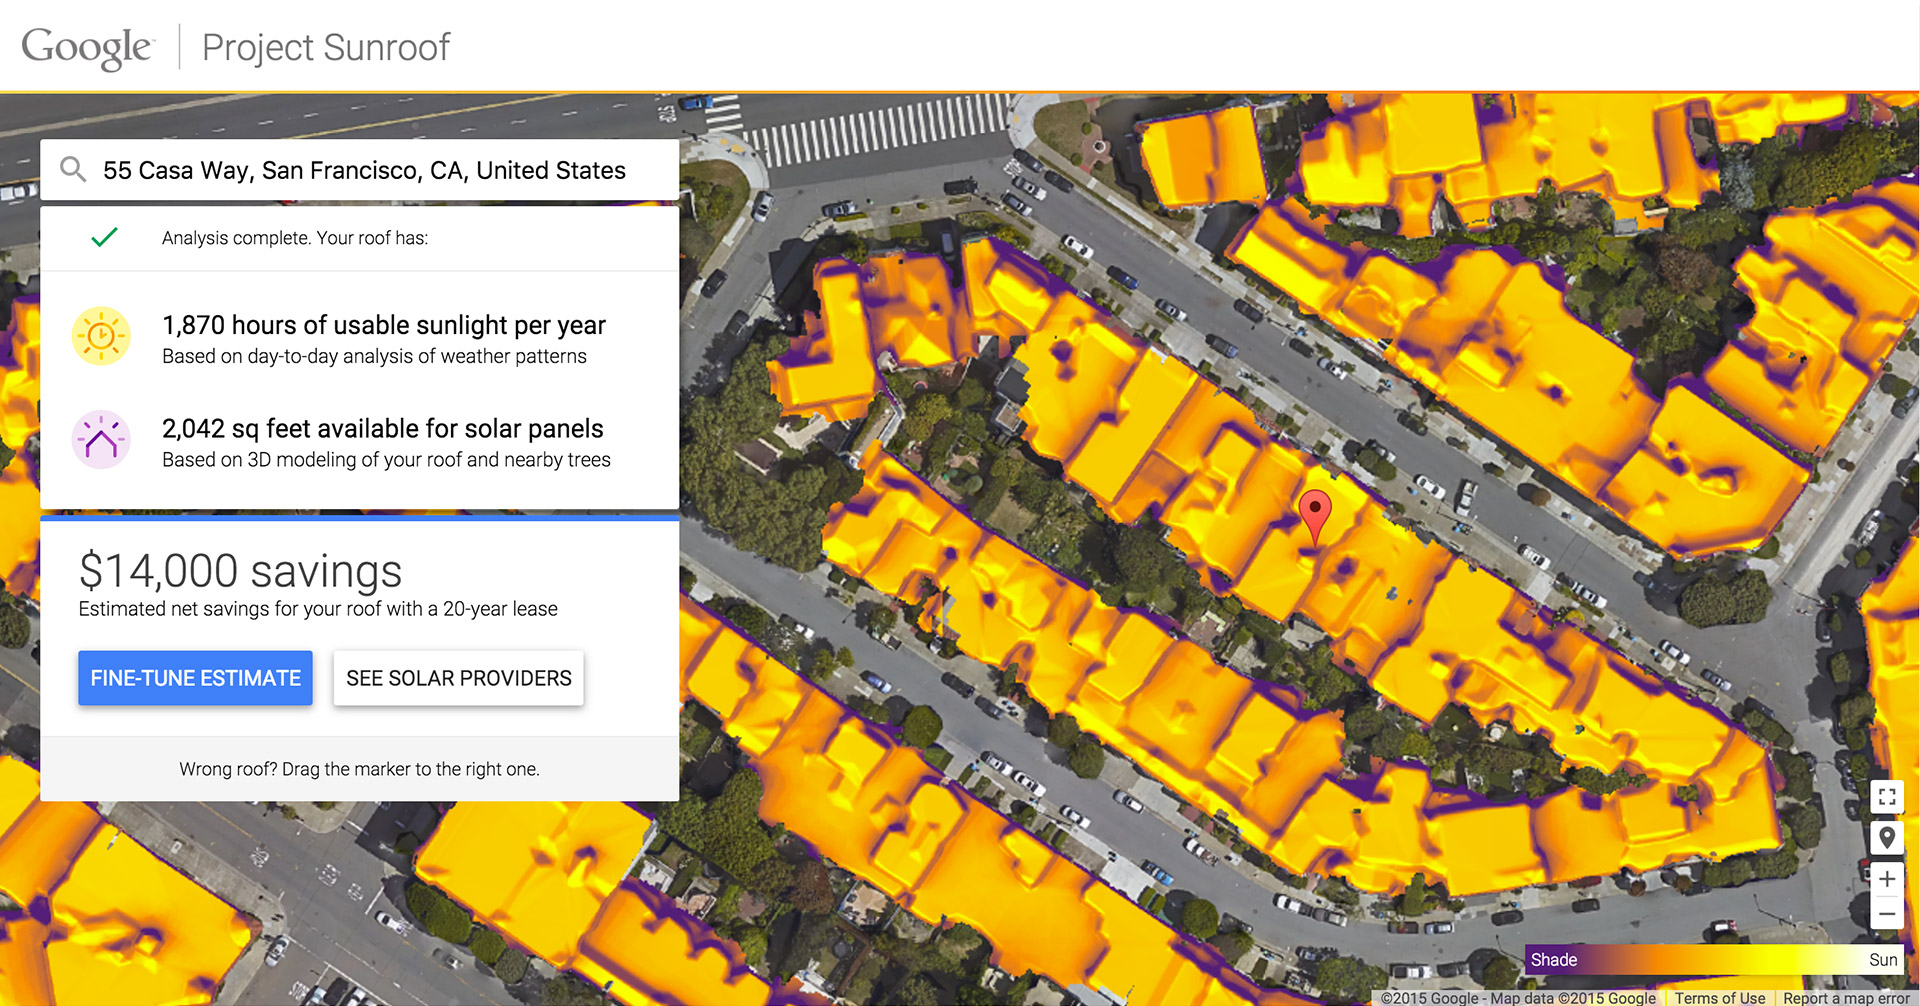

In [158]:
from PIL import Image
myImage = Image.open("prsun.jpg")
myImage

### Objective

- Explore renewable energy potential, in the shape of solar energy, for private use in the state of California.

### Problem Description

0. Identify state of dataframe.
- Clear data of any Not a Number (NaN) values.

1. How much sunroof solar panel coverage is available in the state of California per Postal Code? 

2. What is the potential number of solar panels that can be installed on buildings across California per Postal Code?

3. What is the potential solar power generation numbers in California (in kWh / year) per Postal Code?

4. Conduct a Two Samples Independent Two Tailed Hypothesis Testing on Potential Solar Power Generation of California vs Arizona.

5. Find the number of buildings estimated to have a solar installation, at time of data collection.

6. What is the total potential numbers of solar panels to be installed on California vs Neighbouring States?

7. What is the total potential solar power generation numbers in California vs Neighbouring States?

### Problem Statement

- Conduct a feasibility study on how much of California's energy needs could be met by using sunroof solar panels and what is required to construct such an infrastructure.

## Data Loading

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import numpy as np
import seaborn as sns
import statistics
from numpy import array, diag
from numpy.linalg import inv, det, eig

Data from Google Cloud's BigQuery

- Dataframe: bigquery-public-data / sunroof_solar / solar_potential_by_postal_code

- Query: SELECT * FROM `bigquery-public-data.sunroof_solar.solar_potential_by_postal_code`
WHERE state_name = 'California' or state_name = 'Oregon' or state_name = 'Nevada' or state_name = 'Arizona'

In [160]:
data = pd.read_csv('data.csv') # Using pd.read_csv to load the local csv file downloaded from Google Cloud's BigQuery.
df = data[(data['state_name']== 'California')] # Data loaded is that of several states besides California. However, California will only be used for now.
df

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets,carbon_offset_metric_tons,existing_installs_count,center_point
0,92305,California,34.230334,34.120193,-116.700147,-116.988852,34.158917,-116.934747,1437.35,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,0.000000,0,POINT(-116.934747015015 34.1589173315315)
1,92386,California,34.248613,34.235998,-116.823745,-116.831558,34.242019,-116.827513,1437.35,172,...,8.520551e+05,1.006566e+05,6.500947e+04,1.614706e+05,5336.520386,1.184395e+06,"[[0,124],[5,38],[10,8],[15,1],[20,1]]",322.902771,0,POINT(-116.827512829095 34.2420186792512)
2,92391,California,34.246589,34.231920,-117.221289,-117.246519,34.239687,-117.233614,1437.35,100,...,7.404347e+05,2.796245e+05,9.033247e+04,1.123784e+06,6206.077441,2.234176e+06,"[[0,56],[5,20],[10,11],[15,2],[20,2],[25,2],[3...",609.105743,0,POINT(-117.233614335539 34.2396868761029)
3,92321,California,34.280340,34.232123,-117.137712,-117.202397,34.252407,-117.173216,1437.35,399,...,2.306457e+06,9.828704e+05,8.409727e+05,1.622699e+06,7071.080481,5.772514e+06,"[[0,220],[5,117],[10,31],[15,7],[20,4],[25,3],...",1573.766448,1,POINT(-117.173215610218 34.2524074208333)
4,92325,California,34.266494,34.227210,-117.243062,-117.342378,34.242899,-117.282972,1437.35,746,...,4.148315e+06,1.424179e+06,1.590810e+06,2.457652e+06,6891.956677,9.695461e+06,"[[0,397],[5,251],[10,40],[15,16],[20,17],[25,1...",2643.283562,0,POINT(-117.28297177123 34.2428992572657)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,95319,California,37.638035,37.637649,-120.900376,-120.901015,37.637818,-120.900754,1233.35,5,...,2.134548e+04,2.736827e+04,4.987433e+04,4.488651e+03,26788.425684,1.201526e+05,"[[0,1],[15,2],[20,1],[25,1]]",32.757329,0,POINT(-120.90075356 37.63781772)
1612,95836,California,38.735031,38.707676,-121.492322,-121.546790,38.723121,-121.508470,1209.55,5,...,7.301827e+03,0.000000e+00,0.000000e+00,2.981115e+05,61649.504321,3.090528e+05,"[[5,2],[40,1],[65,1],[85,1]]",84.257381,0,POINT(-121.508469872222 38.7231208611111)
1613,93724,California,36.737496,36.735450,-119.788111,-119.789694,36.736560,-119.789202,1235.90,5,...,2.427971e+04,1.039804e+05,1.183769e+05,8.633118e+05,229151.868555,1.121448e+06,"[[45,1],[110,1],[160,1],[205,1],[245,1]]",305.741464,1,POINT(-119.78920185 36.7365600833333)
1614,91182,California,34.149359,34.148787,-118.140291,-118.141023,34.148964,-118.140715,1405.05,5,...,1.212025e+05,2.327299e+04,3.420987e+04,2.187083e+05,51973.482007,3.973936e+05,"[[5,2],[30,1],[65,1],[145,1]]",108.341821,0,POINT(-118.140715083333 34.148964)


In [161]:
df.shape # Identifying how many rows and columns of the dataframe we are dealing with.

(1212, 32)

In [162]:
data.shape

(1616, 32)

## Data Cleaning

### Removal of NaN Values

In [163]:
df.dropna(axis=0, how='any', inplace=True) # Removing NaNs from the data. Axis = 0 denotes that any NaNs in the column will
# be removed along with its accompanying data. Inplace=True indicates that the changes made will be kept from this point on.
df.shape

C:\Users\radya\AppData\Local\Temp\ipykernel_12036\3920804919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, how='any', inplace=True) # Removing NaNs from the data. Axis = 0 denotes that any NaNs in the column will


(1211, 32)

From the execution of the .dropna syntax, we can identify that there was one NaN value inside the dataframe, which has now since been removed.

In [164]:
data.dropna(axis=0, how='any', inplace=True)
data.shape

(1615, 32)

## Data Exploration and Analysis

### 1. Solar Panel Coverage on Buildings in the state of California (per Postal Code)

In [165]:
df1 = df[['region_name','state_name', 'percent_covered', 'count_qualified', 'percent_qualified']]
# Only the columns above (e.g. region_name) are crucial for retainment. region_name in this case is postal code.

df1.rename(columns = {'region_name':'Post Code', 'state_name':'State', 'percent_covered':'Coverage (%)', 'count_qualified':'Qualified Buildings', 
'percent_qualified':'Coverage of Qualified Buildings (%)'}, inplace = True)
# The columns are renamed for ease of use. Inplace=True is used to save the changes made.

df1

C:\Users\radya\AppData\Local\Temp\ipykernel_12036\1478223588.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns = {'region_name':'Post Code', 'state_name':'State', 'percent_covered':'Coverage (%)', 'count_qualified':'Qualified Buildings',


,Post Code,State,Coverage (%),Qualified Buildings,Coverage of Qualified Buildings (%)
1,92386,California,96.021841,172,13.972380
2,92391,California,94.362745,100,12.987013
3,92321,California,89.335317,399,22.154359
4,92325,California,71.642304,746,17.906865
5,94516,California,76.635514,37,45.121951
...,...,...,...,...,...
1610,95319,California,100.000000,5,100.000000
1612,95836,California,27.777778,5,100.000000
1613,93724,California,100.000000,5,83.333333
1614,91182,California,100.000000,5,83.333333


In [166]:
df1cov = df1.groupby('State').agg(Min_Coverage=('Coverage (%)',np.min), Mean_Coverage=('Coverage (%)',np.mean), Median_Coverage=('Coverage (%)',np.median),
Mode_Coverage=('Coverage (%)',statistics.mode), Max_Coverage=('Coverage (%)',np.max))
# This syntax can be used to find the central tendency of the data individually with specific column names as outputs as well.

df1cov.rename(columns = {'Min_Coverage':'Minimum Coverage (%)', 'Mean_Coverage':'Mean Coverage (%)', 'Median_Coverage':'Median Coverage (%)',
'Mode_Coverage':'Mode Coverage (%)', 'Max_Coverage':'Maximum Coverage (%)'}, inplace = True)

df1cov.round(2) # The results of the calculations are rounded to two decimal points.

,Minimum Coverage (%),Mean Coverage (%),Median Coverage (%),Mode Coverage (%),Maximum Coverage (%)
State,,,,,
California,0.01,89.85,97.96,100.0,100.0


Through Project Sunroof's machine learning algorithm, potential solar panel coverage on home rooftops could be identified and put in numbers. Here, we see that throughout the state of California, the Project Sunroof software has managed to cover an average of 90% of rooftops across all postal codes / counties. However, in most cases, Project Sunroof has been able to cover up to 98% - 100% of rooftops within a region. Even so, there are some places with exceptionally low coverage. We will be covering that further on.

In [167]:
df1qb = df1.groupby('State').agg(Min_Coverage=('Qualified Buildings',np.min), Mean_Coverage=('Qualified Buildings',np.mean),
Median_Coverage=('Qualified Buildings',np.median), Mode_Coverage=('Qualified Buildings',statistics.mode), Max_Coverage=('Qualified Buildings',np.max))

df1qb.rename(columns = {'Min_Coverage':'Min. Qualified Building', 'Mean_Coverage':'Mean Qualified Building', 'Median_Coverage':'Median Qualified Building', 
'Mode_Coverage':'Mode Qualified Building', 'Max_Coverage':'Max. Qualified Building'}, inplace = True)

df1qb.round(2)

,Min. Qualified Building,Mean Qualified Building,Median Qualified Building,Mode Qualified Building,Max. Qualified Building
State,,,,,
California,1,7107.53,6802.0,2,24776


The data regarding qualified buildings is quite interesting. It denotes the number of buildings that are actually able to support a solar panel structure on its rooftop. Here, we could see that there is an average (mean) of about 7108 buildings in each postal codes that have the potential to install solar panels, with a / some postal code(s) even having 24776 potential buildings. However, we must consider that the mean here does not paint the whole picture. From the mode, we could see that most postal codes would only have as little as 2 buildings that could support solar panels.

In [168]:
df1qbp = df1.groupby('State').agg(Min_Coverage=('Coverage of Qualified Buildings (%)',np.min), Mean_Coverage=('Coverage of Qualified Buildings (%)',np.mean),
Median_Coverage=('Coverage of Qualified Buildings (%)',np.median), Mode_Coverage=('Coverage of Qualified Buildings (%)',statistics.mode),
Max_Coverage=('Coverage of Qualified Buildings (%)', np.max))

df1qbp.rename(columns = {'Min_Coverage':'Min. Coverage of Qualified Buildings (%)', 'Mean_Coverage':'Mean Coverage of Qualified Buildings (%)',
'Median_Coverage':'Median Coverage of Qualified Buildings (%)', 'Mode_Coverage':'Mode Coverage of Qualified Buildings (%)',
'Max_Coverage':'Max. Coverage of Qualified Buildings (%)'}, inplace = True)

df1qbp.round(2)

,Min. Coverage of Qualified Buildings (%),Mean Coverage of Qualified Buildings (%),Median Coverage of Qualified Buildings (%),Mode Coverage of Qualified Buildings (%),Max. Coverage of Qualified Buildings (%)
State,,,,,
California,2.78,88.48,91.72,100.0,100.0


Information regarding the coverage of qualified building (%) is an offshoot of the coverage data in which the percentages above denotes how much of the buildings covered by the Project Sunroof software is truly able to support solar panels. For example, out of the average 89.95% buildings covered by Project Sunroof, an astounding average 88.48% is solar panel capable.

In [169]:
df1co = df.groupby('state_name').agg(Min_Coverage=('carbon_offset_metric_tons',np.min), Mean_Coverage=('carbon_offset_metric_tons',np.mean),
Median_Coverage=('carbon_offset_metric_tons',np.median), Mode_Coverage=('carbon_offset_metric_tons',statistics.mode),
Max_Coverage=('carbon_offset_metric_tons',np.max))

df1co.rename(columns = {'Min_Coverage':'Min. Carbon Offset (metric tons)', 'Mean_Coverage':'Mean Carbon Offset (metric tons)',
'Median_Coverage':'Median Carbon Offset (metric tons)', 'Mode_Coverage':'Mode Carbon Offset (metric tons)',
'Max_Coverage':'Max. Carbon Offset (metric tons)'}, inplace = True)

df1co.round(2)

,Min. Carbon Offset (metric tons),Mean Carbon Offset (metric tons),Median Carbon Offset (metric tons),Mode Carbon Offset (metric tons),Max. Carbon Offset (metric tons)
state_name,,,,,
California,0.0,55225.96,46486.12,0.0,324694.83


Carbon Dioxide Abatement is defined as the gap of decrease of carbon dioxide emissions. This means that we are looking at how much carbon dioxide could be decreased as a result of installing solar panels in each postal code. 

From the table we could see that we can average a decrease of about 55 thousand metric tons of carbon dioxide emissions in most postal codes. However, this does not the true nature of the data. When we look closer, we could discern that most postal codes would potentially have no decrease in carbon dioxide emissions at all. It should not be surprising considering the qualified buildings to emissions ratio in those area.

 Skewness = -3.0880953371351008
 Kurtosis = 9.241262113445686


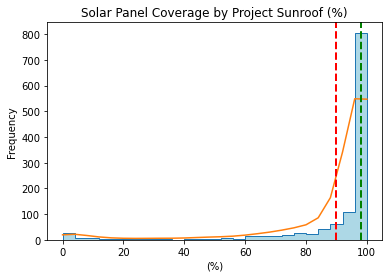

In [170]:
cov = df1['Coverage (%)'] # Shortening the name of the column for ease of use.

print(' Skewness = ' + str(cov.skew())) # Finding the skewness and kurtosis.
print(' Kurtosis = ' + str(cov.kurt()))

cov.plot.hist(title='Solar Panel Coverage by Project Sunroof (%)', color='lightblue', bins=25) # Loading of the histogram as well as its settings.
density = stats.gaussian_kde(cov) # Loading of the Gaussian kernel to visualize the skewness of the dataframe.
n, x, _ = plt.hist(cov, histtype='step', bins=25) # Defining the histogram as a step type and setting the number of bins (number of range for each step).

plt.plot(x, density(x)*10**4) # Scaling the Gaussian kernel density.
plt.axvline(cov.mean(), color='red', linestyle='dashed', linewidth=2) # Setting the visualization of the mean.
plt.axvline(cov.median(), color='green', linestyle='dashed', linewidth=2) # Setting the visualization of the median.
plt.xlabel('(%)') # Defining the X-axis label.
plt.show() # Showing the resulting graph.

Creating a histogram provides simpler way to understand the data we are dealing with. Here, we can visually discern that Project Sunroof software has successfully covered most buildings throughout all postal codes in California. Hence, why the histogram is leaning heavily towards the right. This idea is reinforced by the skewness and kurtosis. 

A skewness of less than -1 (in this case about -3) denotes that the data is highly skewed to the left, whilst a kurtosis of more than 1 (in this case kurtosis is as high as 9) tells us that the data has heavier tales / there are a lot of data on within the tail (in this case to the left). This translates to the fact that a small amount postal codes has had their buildings not well covered by the Project Sunroof software, whilst most postal codes has had most of its buildings covered.

 Skewness = 0.47992464975393745
 Kurtosis = -0.3460386015942105


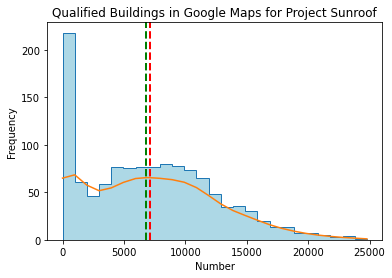

In [171]:
qb = df1['Qualified Buildings']

print(' Skewness = ' + str(qb.skew()))
print(' Kurtosis = ' + str(qb.kurt()))

qb.plot.hist(title='Qualified Buildings in Google Maps for Project Sunroof', color='lightblue', bins=25)
density = stats.gaussian_kde(qb) 
n, x, _ = plt.hist(qb, histtype='step', bins=25)

plt.plot(x, density(x)*10**6)
plt.axvline(qb.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(qb.median(), color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Number')
plt.show()

The graph illustrates how many buildings are qualified to support solar panels on its rooftops in each postal code. Here we have a skewness between -0.5 - 0.5 (around 0.47), which means that our data is fairly symmetrical. Our kurtosis sits near zero at about -0.35, which means that we assume a normal distribution. Translated, we can define that a large amount of postal codes only have 0 - 1000 buildings that can potentially house solar panels. However, these postal codes do not dominate the data, meaning that there are many other postal codes that have more buildings in them that can potentially be installed with solar panels.

 Skewness = -2.7264853949080874
 Kurtosis = 10.866885606329651


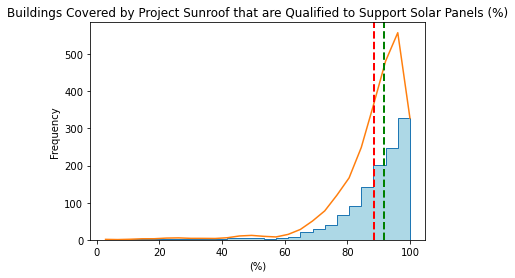

In [172]:
qbp = df1['Coverage of Qualified Buildings (%)']

print(' Skewness = ' + str(qbp.skew()))
print(' Kurtosis = ' + str(qbp.kurt()))

qbp.plot.hist(title='Buildings Covered by Project Sunroof that are Qualified to Support Solar Panels (%)', color='lightblue', bins=25)
density = stats.gaussian_kde(qbp)
n, x, _ = plt.hist(qbp, histtype='step', bins=25)

plt.plot(x, density(x)*10**4)
plt.axvline(qbp.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(qbp.median(), color='green', linestyle='dashed', linewidth=2)
plt.xlabel('(%)')
plt.show()

The data regarding how much buildings covered by Project Sunroof are qualified to have solar panels on its rooftop is similar to that of the Solar Panel Coverage by Project Sunroof data. 

Here we have a skewness of -2.73, a data which is highly skewed to the left. The kurtosis is 10.87, which there are a lot of data that is within the tail (in this case to the left), which is leptokurtic (has heavier tails). In translation, we can say that a small amount postal codes have low percentages of buildings qualified to have solar panels, whilst most postal codes have high percentages of qualified buildings.

 Skewness = 1.079919108456033
 Kurtosis = 1.644580176546834


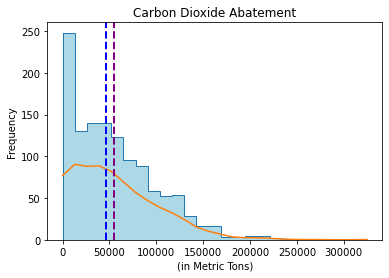

In [173]:
comt = df['carbon_offset_metric_tons']

print(' Skewness = ' + str(comt.skew()))
print(' Kurtosis = ' + str(comt.kurt()))

comt.plot.hist(title='Carbon Dioxide Abatement', color='lightblue', bins=25)
density = stats.gaussian_kde(comt)
n, x, _ = plt.hist(comt, histtype='step', bins=25) 

plt.plot(x, density(x)*10**7)
plt.axvline(comt.mean(), color='purple', linestyle='dashed', linewidth=2)
plt.axvline(comt.median(), color='blue', linestyle='dashed', linewidth=2)
plt.xlabel('(in Metric Tons)')
plt.show()

From the histogram above, we have both a skewness and kurtosis that is above 1 (1.08 and 1.65 respectively). This tells us that the data is heavily skewed to the right and is leptokurtic (has heavy tails). In translation, the carbon dioxide abatement every postal codes in California vary differently, with most sitting at a range of 0 - 150 thousand metric tons, and the rest above it.

### 2. Potential Numbers of Solar Panel to be Installed on California's Buildings (per Postal Code)

C:\Users\radya\AppData\Local\Temp\ipykernel_12036\3062596260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_1.rename(columns = {'number_of_panels_n':'Northern Facing Panels', 'number_of_panels_s':'Southern Facing Panels',


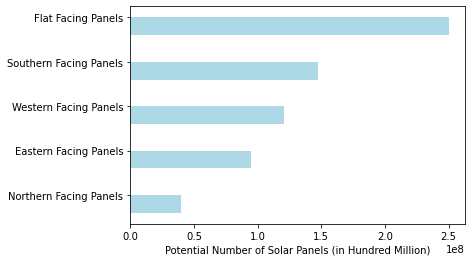

In [174]:
df2_1 = df[['number_of_panels_n','number_of_panels_s', 'number_of_panels_e', 'number_of_panels_w', 'number_of_panels_f']]
df2_1.rename(columns = {'number_of_panels_n':'Northern Facing Panels', 'number_of_panels_s':'Southern Facing Panels',
'number_of_panels_e':'Eastern Facing Panels', 'number_of_panels_w':'Western Facing Panels', 'number_of_panels_f':'Flat Facing Panels'}, inplace = True)
df2_1.sum(axis=0).sort_values()
df2_2 = df2_1.sum(axis=0).sort_values()
# Filtering and renaming the columns used. We are looking at the potential solar power generation by solar panels
# facing at five general directions: North, South, West, East, and Flat. We sum the results according to these directional solar panels.

fig = plt.figure()
ax = fig.add_subplot() # Syntax used to establish an axis.
width = 0.4 # Width of the bar is established.

df2_2.plot(kind='barh', color='lightblue', ax=ax, width=width, position=1) # The plots are configured here. Kind is set to 'bar' and other
# details are put according to definitions made earlier. Position is used to determine where the bar would be located.
plt.xlabel('Potential Number of Solar Panels (in Hundred Million)')
# This syntax is used to set name for the x-axis.
plt.show()

Every building comes in different and sizes, hence why we are calculating how many solar panels could fit above their rooftops. Besides finding the overall numbers of solar panels that could fit in such rooftops, we could also take a look at how many solar panels could be installed at certain general directions. In this case, we are looking at solar panels facing the North, East, West, South and Flat facing panels that point upwards. This corresponds to the shape and direction of a building's rooftop.

In short, we could see that the buildings that are suitable for solar panel placements have flat rooftops, with a potential 250 million solar panels likely to be installed. Northern facing panels are at the minimum, with only a potential of about 40 million solar panels possible.

### 3. Potential Solar Power Generation Numbers in California (in kWh / Year per Postal Code)

C:\Users\radya\AppData\Local\Temp\ipykernel_12036\2908385708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_1.rename(columns = {'yearly_sunlight_kwh_n':'Northern Facing Panels', 'yearly_sunlight_kwh_s':'Southern Facing Panels',


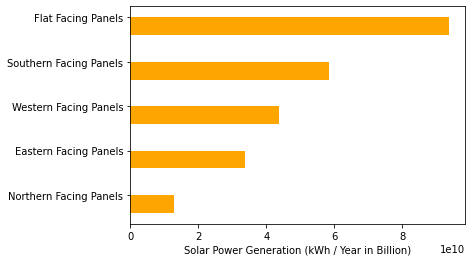

In [175]:
df3_1 = df[['yearly_sunlight_kwh_n','yearly_sunlight_kwh_s', 'yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_w', 'yearly_sunlight_kwh_f']]
df3_1.rename(columns = {'yearly_sunlight_kwh_n':'Northern Facing Panels', 'yearly_sunlight_kwh_s':'Southern Facing Panels',
'yearly_sunlight_kwh_e':'Eastern Facing Panels', 'yearly_sunlight_kwh_w':'Western Facing Panels', 'yearly_sunlight_kwh_f':'Flat Facing Panels'},
inplace = True)
df3_1.sum(axis=0).sort_values()
df3_2 = df3_1.sum(axis=0).sort_values()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.4

df3_2.plot(kind='barh', color='orange', ax=ax, width=width, position=1)
plt.xlabel('Solar Power Generation (kWh / Year in Billion)')
plt.show()

Again, similar to the bar graph in No. 2, we are looking at solar panels facing the North, East, West, South and Flat facing panels that point upwards. However, in this case, we are looking at the solar power generation (kWh / Year).

It is no suprise then that the flat rooftops could generate the most power, with a potential of 9 billion kWh/Year or 9 terrawatt per hour/Year likely. Northern facing panels are once again the minimum, with only a potential of about 1 billion kWh/Year or 1 terrawatt per hour/Year possible.

### 4. Potential Solar Power Generation Numbers in California vs Arizona

We will be comparing the Potential Solar Power Generation numbers (in kWh / Year) for the states of California and Arizona. Here, we will assume a hypothesis in which both states have an average power generation that is equal to each other.

Null Hypothesis: California's Potential Solar Power Generation is equal to Arizona's Potential Solar Power Generation
Alternative Hypothesis: California's Potential Solar Power Generation is NOT equal to Arizona's Potential Solar Power Generation

OR

h0: California Potential kWh / Year = Arizona Potential kWh / Year
h1: California Potential kWh / Year != Arizona Potential kWh / Year

In [176]:
data['yearly_sunlight_kwh_total'] = data['yearly_sunlight_kwh_total'].apply(np.log) # We are applying np.log here because the results are too large for
# the following execution of Python calculations.
data_n = data[['state_name', 'yearly_sunlight_kwh_total']]
data_n.dropna(axis=0, how='any', inplace=True)

solar_cali = data_n[data_n['state_name']=='California']['yearly_sunlight_kwh_total'] # We are defining total power generation for each state for ease of
solar_ariz = data_n[data_n['state_name']== 'Arizona']['yearly_sunlight_kwh_total'] # use in finding the P-Value.

stat, p = stats.ttest_ind(solar_cali, solar_ariz)
print('P-value:', p)

P-value: 5.992500179226208e-06


C:\Users\radya\AppData\Local\Temp\ipykernel_12036\709006363.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_n.dropna(axis=0, how='any', inplace=True)


In this case we will reject the null hypothesis because our P-Value is lower than 0.05. This would mean that there are significant differences in the potential solar power generation numbers (kWh / Year) between California and Arizona.

### 5. Number of Buildings Estimated to have a Solar Installation in California

In [177]:
df7 = df.copy()

print(f'Min. No. of Buildings: ', df7['existing_installs_count'].min())
print(f'Mean No. of Buildings: ', df7['existing_installs_count'].mean())
print(f'Median No. of Buildings: ', df7['existing_installs_count'].median())
print(f'Mode No. of Buildings: ', df7['existing_installs_count'].mode())
print(f'Max. No. of Buildings: ', df7['existing_installs_count'].max())
print(f'Total No. of Buildings: ', df7['existing_installs_count'].sum())

Min. No. of Buildings:  0
Mean No. of Buildings:  273.55408753096617
Median No. of Buildings:  137.0
Mode No. of Buildings:  0    0
Name: existing_installs_count, dtype: int64
Max. No. of Buildings:  2235
Total No. of Buildings:  331274


There is an average of about 273 solar panel installations in each postal code in California, with numerous postal codes having no installations at all, and one with as much as 2235 installations. In total, the whole state of California already has about 331 thousand sunroof solar panel installations.

### 6. Total Potential Numbers of Solar Panel to be Installed on California vs Neighbouring States

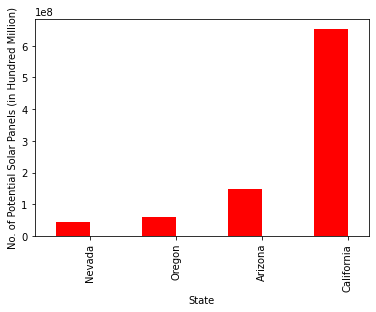

In [179]:
bar_nop = data.groupby('state_name')['number_of_panels_total'].sum().sort_values()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.4

bar_nop.plot(kind='bar', color='red', ax=ax, width=width, position=1)

plt.xlabel('State')
plt.ylabel('No. of Potential Solar Panels (in Hundred Million)')
plt.show()

At a glance, this bar graph shows us that California has the highest potential for solar panel installation at about 653 million units capable. Nevada, in comparison, has the lowest potential at only about 44 million units capable. Interestingly, when California's neighbouring states' potential are combined, they sit at a total of about 252 million number of potential solar panels to be installed. This is still lower than California's potential alone, hinting not only at the compelling opportunity for California but also at the disparity of the population between these four states.

### 7. Total Potential Solar Power Generation Numbers in California vs Neighbouring States

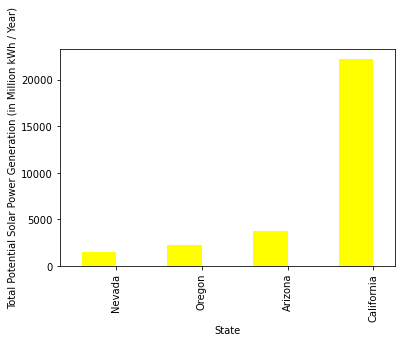

In [192]:
bar_sp = data.groupby('state_name')['yearly_sunlight_kwh_total'].sum().sort_values()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.4

bar_sp.plot(kind='bar', color='yellow', ax=ax, width=width, position=1)

plt.xlabel('State')
plt.ylabel('Total Potential Solar Power Generation (in Million kWh / Year)')
plt.show()

Following the bar graph preceding this, California has the highest potential for solar power generation numbers at about 20 Million kWh/Year. Nevada, again, has the lowest potential at only about 3 Million kWh/Year. Just as before, California's neighbouring states' combined potential are lower of that of California's potential alone, at about 7 Million kWh/Year versus about 20 Million kWh/Year respectively.

## Conclusion



There are a lot of details put upon in this notebook, but it ultimately boils down to how much potential electrical generation all solar panels put in place by Project Sunroof is there. As such we look upon one simple calculation: 

In [182]:
print(f'Total Power Generation from : ', df['yearly_sunlight_kwh_total'].sum())
print((243/259.5)*100, '%')

Total Power Generation from :  242638396940.61917
93.64161849710982 %


According to a U.S. Deparment of Report on the state of California, California's annual total electricity consumption is about 259.5 tWh. According to our calculations, if all potential solar power generation that has been calculated by the Project Sunroof software is met, about 93% of California's annual electricity consumption should be able to be met by sunroof solar power alone.

However, this is easier said then done.

Project Sunroof's machine learning algorithm is able to cover an average of 90%, with each postal code having an average of 7108 buildings that can be installed with solar panels. However, numerous postal codes would only have up to 1000 buildings that are potentially able to support solar panels.

In addition, average of 88.48% of buildings that Project Sunroof have covered are actually solar capable. There are small amount of postal codes that could only house a low percentage of qualified buildings.

If it is possible to install solar panels on all of these buildings, then we could decrease an average of 55 thousand metric tons of carbon dioxide per postal code in California. If we look at the data closely, we could see that most postal codes would only be able to decrease carbon dioxide emissions by 0 - 150 thousand metric tons.

When comparing the total potential solar power generation between California and Arizona, we could discern that California has more potential than Arizona. Moreover, California has more potential in the number of solar panel installations and solar power generation than its neighbouring states.

California's potential of installing 252 million solar panels and potential solar power generation of 20 million kWh/year trumphs that of its neighbouring states, with them having a combined potential of installing 44 million panels and generating 7 million kWh/year.

## Bibliography

- Vanessa. (2022, July 6). Which countries are the world's biggest carbon polluters? ClimateTrade. Retrieved August 30, 2022, from https://climatetrade.com/which-countries-are-the-worlds-biggest-carbon-polluters/#:~:text=Specifically%2C%20the%20concentration%20reached%20413,industrial%20levels%20(before%201750).&amp;text=However%2C%20most%20of%20this%20pollution,is%20responsible%20for%20almost%2014%25. 

- Rodriguez-Delgado, C. (2022, June 16). California has some of the worst air quality in the country. the problem is rooted in the san joaquin valley. PBS. Retrieved August 30, 2022, from https://www.pbs.org/newshour/nation/california-has-some-of-the-worst-air-quality-in-the-country-the-problem-is-rooted-in-the-san-joaquin-valley

- Nathanson, J. A. (2022, August 13). Pollution. Encyclopædia Britannica. Retrieved August 30, 2022, from https://www.britannica.com/science/pollution-environment

- Schlanger, Z. (2017, April 19). California is home to 8 of the 10 cities in America where air pollution is worst. Quartz. Retrieved August 30, 2022, from https://qz.com/963089/california-is-home-to-eight-of-the-10-cities-in-america-where-air-pollution-is-worst/#:~:text=Eight%20of%20the%2010%20cities%20with%20the%20highest%20year-round,with%20the%20worst%20ozone%20pollution. 
 
- Genc, S., Zadeoglulari, Z., Fuss, S. H., &amp; Genc, K. (2012, February 19). The adverse effects of air pollution on the nervous system. Journal of toxicology. Retrieved August 30, 2022, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3317189/ 

- Associated Press. (2016, April 20). Los Angeles and Bakersfield top list of worst air pollution in the nation. Los Angeles Times. Retrieved August 30, 2022, from https://www.latimes.com/local/lanow/la-me-air-pollution-report-20160420-story.html 